In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def kmedoids(X, K, initial_medoids, max_iters=100):
    # Inicijalizacija medoida
    medoids = initial_medoids.copy()

    for _ in range(max_iters):
        # Dodjela tačaka klasterima
        distances = np.sum(np.abs(X[:, np.newaxis] - medoids), axis=2)
        labels = np.argmin(distances, axis=1)

        # Ažuriranje medoida
        new_medoids = np.array([X[labels == k][np.argmin(np.sum(distances[labels == k], axis=1))] for k in range(K)])

        # Provera da li su medoidi konvergirali
        if np.all(medoids == new_medoids):
            break

        medoids = new_medoids

    return labels, medoids

In [20]:
# Unos dataseta
X = np.array([[1, 2], [3, 4], [1, 1], [4, 5], [5, 4], [2, 2]])

In [21]:
# Unesite inicijalne medoide
initial_medoids = np.array([[1, 1], [4, 5]])

In [22]:
# Pokretanje K-medoids algoritma
K = len(initial_medoids)
labels, medoids = kmedoids(X, K, initial_medoids)

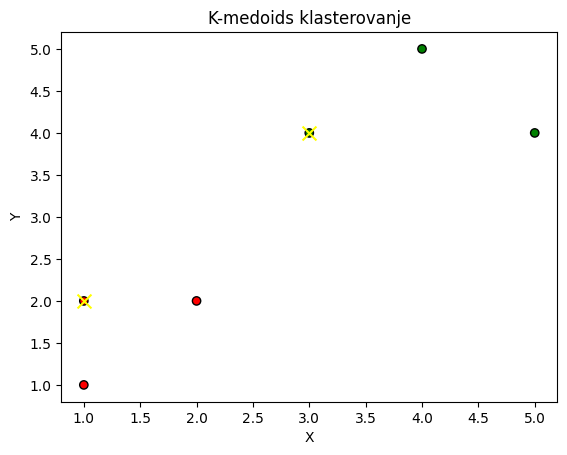

In [23]:
# Prikaz rezultata
colors = ['r', 'g', 'b']
plt.scatter(X[:, 0], X[:, 1], c=[colors[l] for l in labels], edgecolors='k')
plt.scatter(medoids[:, 0], medoids[:, 1], c='yellow', marker='x', s=100)
plt.title('K-medoids klasterovanje')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [24]:
# Ispisivanje klase za svaki podatak
for i, label in enumerate(labels):
    print(f"A{i+1}: Klasa {label+1}")

A1: Klasa 1
A2: Klasa 2
A3: Klasa 1
A4: Klasa 2
A5: Klasa 2
A6: Klasa 1
